# pivot
<br>

## The pivot method is used to reshape data by specifying the index, columns, and values of a DataFrame. 
<br>

- ### The pivot method takes three main arguments: index, columns, and values. 
<br>

## Pivot Transform and reshape the data
<br><br>

- ## index,columns Parameter
<br>

- ## index,columns,value Parameter

In [2]:
import pandas  as pd

data = {
    "Test":[1,2,3,1,2,3,1,2,3], 
    "Names":["Ahmed","Ahmed","Ahmed","Rob","Rob","Rob","Fran","Fran","Fran"],
    "Eng Marks":[80,75,89,69,90,70,75,60,80],
    "Math Marks":[100,99,76,80,58,79,80,90,94]
}

df = pd.DataFrame(data)
df

,Test,Names,Eng Marks,Math Marks
0,1,Ahmed,80,100
1,2,Ahmed,75,99
2,3,Ahmed,89,76
3,1,Rob,69,80
4,2,Rob,90,58
5,3,Rob,70,79
6,1,Fran,75,80
7,2,Fran,60,90
8,3,Fran,80,94


In [3]:
df.pivot(index="Test", columns="Names")

Eng Marks          Math Marks         
Names     Ahmed Fran Rob      Ahmed Fran Rob
Test                                        
1            80   75  69        100   80  80
2            75   60  90         99   90  58
3            89   80  70         76   94  79

In [4]:
df.pivot(index="Test", columns="Names",values="Eng Marks")

Names,Ahmed,Fran,Rob
Test,,,
1,80,75,69
2,75,60,90
3,89,80,70


# Pivot Table

<br>

- ### Pivot table is a way to summarize and aggregate data in a tabular format, similar to a spreadsheet pivot table. 
<br>

- ### It allows you to reorganize and reshape your data by grouping and aggregating values based on one or more columns.

<br>

- ### .pivot_table()
- ### index , column, value Requirment Parameter
- ### .aggfunc = default is mean
- ### all columns analysis on numerical column
- ### Multidimensional dataframe select Multiple columns and indexes
- ### margins parameter
- ### Multiple agg functions
- ### plot graphs
- ### fill_value parameter


In [5]:
import pandas as pd, numpy as np
import seaborn as sns # data visualization

In [6]:
data = sns.load_dataset("tips")
# load data with sns

In [7]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
# what is average of bill according to gender ?

data.groupby("sex")[["total_bill"]].mean()

,total_bill
sex,
Male,20.744076
Female,18.056897


In [9]:
# now extract smoker and no smoker average according to gender

data.groupby(["sex","smoker"])[["total_bill"]].mean().unstack()

total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

## we extract same info easily with pivot table
<br>


In [10]:
data.pivot_table(index="sex",columns="smoker",values="total_bill")

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


### aggfunc parameter

In [11]:
# we can  use all bultin function in aggfunc
data.pivot_table(index="sex",columns="smoker",values="total_bill",aggfunc="std")

smoker,Yes,No
sex,,
Male,9.911845,8.726566
Female,9.189751,7.286455


In [12]:
df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [13]:
# also we can use userdefine function

def custom_agg(x):
        return x.sum() / x.count()

data.pivot_table(index='sex', columns='smoker', values='total_bill', aggfunc=custom_agg)

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [14]:
# all numerical column analysis 

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
numeric_columns

Index(['total_bill', 'tip', 'size'], dtype='object')

In [15]:
data[numeric_columns].pivot_table(index=data["sex"], columns=data["smoker"])

size                 tip           total_bill           
smoker       Yes        No       Yes        No        Yes         No
sex                                                                 
Male    2.500000  2.711340  3.051167  3.113402  22.284500  19.791237
Female  2.242424  2.592593  2.931515  2.773519  17.977879  18.105185

In [16]:
# multi-df

df.pivot_table(index=["sex","smoker"],columns=["day","time"],values="total_bill")

day                 Thur               Fri                Sat        Sun
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner
sex    smoker                                                           
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286

In [17]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
# all columns selected
df.pivot_table(index=["sex","smoker"],columns=["day","time"])

size                                                   tip  \
day                Thur              Fri              Sat       Sun      Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner     Lunch   
sex    smoker                                                                   
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  3.058000   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  2.941500   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  2.990000   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  2.437083   

                                                      total_bill         \
day                    Fri              Sat       Sun       Thur          
time          Dinner Lunch Dinner    Dinner    Dinner      Lunch Dinner   
sex    smoker                                                             
Male   Yes       NaN  1.90  3.246  2.879259  3.521333  19.171000    NaN   
       No        NaN   NaN  2.500  3.256563  3.115349  18.486500    NaN   
Female Yes       NaN  2.66  2.700  2.868667  3.500000  19.218571    NaN   
       No        3.0  3.00  3.250  2.724615  3.329286  15.899167  18.78   

                                                        
day                  Fri                Sat        Sun  
time               Lunch  Dinner     Dinner     Dinner  
sex    smoker                                           
Male   Yes     11.386667  25.892  21.837778  26.141333  
       No            NaN  17.475  19.929063  20.403256  
Female Yes     13.260000  12.200  20.266667  16.540000  
       No      15.980000  22.750  19.003846  20.824286

In [19]:
# margins parameter
# margins = True return the extra info sum of total

data.pivot_table(index='sex', columns='smoker', values='total_bill', aggfunc="sum",margins=True)

smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [20]:
# multiple agg funsions
data.pivot_table(index=["sex","smoker"], columns=["day","time"], aggfunc={"size":"mean","tip":"max","total_bill":"sum"})

size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  5.00   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  6.70   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  5.00   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  5.17   

                                                total_bill                \
day                    Fri           Sat    Sun       Thur           Fri   
time          Dinner Lunch Dinner Dinner Dinner      Lunch Dinner  Lunch   
sex    smoker                                                              
Male   Yes       NaN  2.20   4.73  10.00    6.5     191.71   0.00  34.16   
       No        NaN   NaN   3.50   9.00    6.0     369.73   0.00   0.00   
Female Yes       NaN  3.48   4.30   6.50    4.0     134.53   0.00  39.78   
       No        3.0  3.00   3.25   4.67    5.2     381.58  18.78  15.98   

                                                   
day                     Sat           Sun          
time           Dinner Lunch  Dinner Lunch  Dinner  
sex    smoker                                      
Male   Yes     129.46   0.0  589.62   0.0  392.12  
       No       34.95   0.0  637.73   0.0  877.34  
Female Yes      48.80   0.0  304.00   0.0   66.16  
       No       22.75   0.0  247.05   0.0  291.54

In [21]:
# plot graphs

df = pd.read_csv("./datasets/expense_data.csv")
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [22]:
# get categories
df["Category"].value_counts()

Category
Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: count, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [24]:
df["Date"] = pd.to_datetime(df["Date"]) # convert into datatime

In [25]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [26]:
df["month"] = df["Date"].dt.month_name() # get month name

In [27]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


In [28]:
# get category Price According to month

# fill nan value with 0
df.pivot_table(index=["month"],columns=["Category"],values="INR",aggfunc="sum",fill_value=0)

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
month,,,,,,,,,,,,,
December,11000,2590,196,0,6440.72,0,4800,1790,0,0,400,513.72,914.0
February,0,798,0,0,5579.85,0,2808,20000,0,0,0,1800.00,5078.8
January,1000,0,0,1400,9112.51,0,4580,13178,0,8000,0,200.00,2850.0
March,0,0,0,0,195.00,0,0,900,0,0,0,0.00,30.0
November,2000,0,0,0,3174.40,115,0,2000,3,0,0,0.00,331.0


<Axes: xlabel='month'>

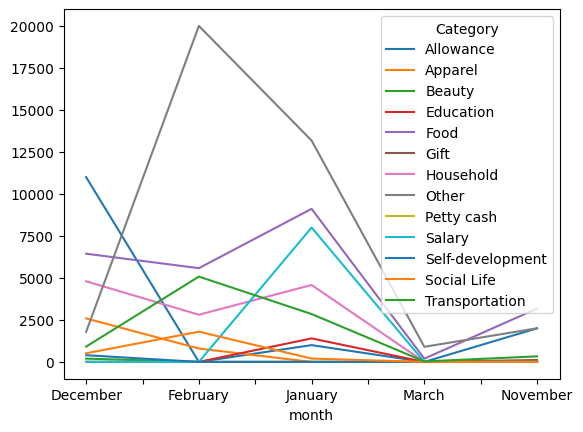

In [29]:
# plot a graph 
df.pivot_table(index=["month"],columns=["Category"],values="INR",aggfunc="sum",fill_value=0).plot()

<Axes: xlabel='month'>

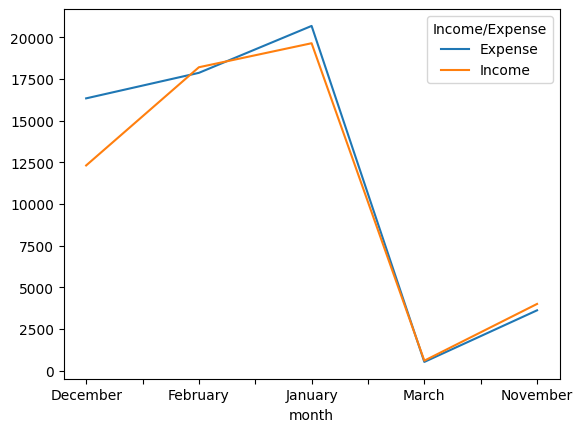

In [30]:
# fill_value 
df.pivot_table(index=["month"],columns=["Income/Expense"],values="INR",aggfunc="sum",fill_value=0).plot()

### Question-1:

Make a pivot table by using the columns "verification_status", "contract_type", "rarity_score" and "last_sale_price" to find out the total values.

In [31]:
train = pd.read_csv("./datasets/train.csv")
train.head()

,Unnamed: 0,rarity_score,last_sale_date,last_sale_price,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,...,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets
0,0,2.000000,2022-11,1.266732,1,2022-04,verified,2,own,1000.0,...,31,187.967742,8.290323,60.935484,0,0,2,591,28,380
1,1,97.077216,2021-08,1.200357,8888,2021-07,verified,5,own,500.0,...,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
2,2,139.453086,2022-08,3.180572,8888,2021-07,verified,5,own,500.0,...,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
3,3,127.753445,2021-08,3.502910,8888,2021-07,verified,5,own,500.0,...,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
4,4,112.315719,2022-09,4.009567,8888,2021-07,verified,5,own,500.0,...,11,133.181818,13.454545,55.181818,0,0,7,402,47,239


In [44]:
train = train.drop(columns=["Unnamed: 0"])
train.head()

,rarity_score,last_sale_date,last_sale_price,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,platform_fees,...,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets
0,2.000000,2022-11,1.266732,1,2022-04,verified,2,own,1000.0,250,...,31,187.967742,8.290323,60.935484,0,0,2,591,28,380
1,97.077216,2021-08,1.200357,8888,2021-07,verified,5,own,500.0,250,...,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
2,139.453086,2022-08,3.180572,8888,2021-07,verified,5,own,500.0,250,...,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
3,127.753445,2021-08,3.502910,8888,2021-07,verified,5,own,500.0,250,...,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
4,112.315719,2022-09,4.009567,8888,2021-07,verified,5,own,500.0,250,...,11,133.181818,13.454545,55.181818,0,0,7,402,47,239


In [52]:
train.pivot_table(index='verification_status',columns='contract_type', values=['rarity_score','last_sale_price'],aggfunc='sum')

last_sale_price                 rarity_score              
contract_type               default            own       default           own
verification_status                                                           
approved                 658.931935    1684.819488  3.973082e+08  3.929607e+06
verified                 370.304092  667394.862655  2.475007e+06  4.165654e+07

### Question-2:

<br>

- ### Make a pivot table of the brands (the required brands are given below) from the "Year" 2018 to the year 2022 in which the "Price" is shown as average values and "Miles" are in median values. 
- ### In this pivote table, every row represents a particular brand and each column represents either average "Price" of a partucular year or median values of "Miles" of a particular year.

<br>

- ### At the end plot a kde chart for the "Price" and "Miles" by using your pivot table.
<br>

### There are some challenges to solve this task:
<br>

- ### There is no column that is represented to the brand name of the car. You have to find out on your own.
- ### Some values of "Years" column are misleading. You have to reset this column too that every value should tell a valid meaning.

In [106]:
df = pd.read_csv("./datasets/carvana.csv")
df.head()

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990


In [107]:
# Extract Brand

df["Brand"] = df.Name.str.split(" ").str.get(0) 

In [108]:
df.head()

,Name,Year,Miles,Price,Brand
0,Chevrolet Trax,2018,41946,16990,Chevrolet
1,GMC Terrain,2020,45328,23990,GMC
2,Jeep Wrangler,2012,81068,21590,Jeep
3,Jeep Renegade,2019,35372,21590,Jeep
4,BMW X,20173,68992,22990,BMW


In [109]:
# extract year
import re 

re.findall(r"\d{4}",str(20173))[0]
# extract only 4 first number using re

'2017'

In [110]:
df["Year"].apply(lambda x: re.findall(r"\d{4}",str(x))[0])

0        2018
1        2020
2        2012
3        2019
4        2017
         ... 
21995    2014
21996    2016
21997    2013
21998    2020
21999    2012
Name: Year, Length: 22000, dtype: object

In [111]:
df["Year"] = df["Year"].apply(lambda x: re.findall(r"\d{4}",str(x))[0])

In [112]:
df.head()

,Name,Year,Miles,Price,Brand
0,Chevrolet Trax,2018,41946,16990,Chevrolet
1,GMC Terrain,2020,45328,23990,GMC
2,Jeep Wrangler,2012,81068,21590,Jeep
3,Jeep Renegade,2019,35372,21590,Jeep
4,BMW X,2017,68992,22990,BMW


In [120]:
# filter with query method

# df["Year"] = ('Year >= 2018 and Year <= 2022')

mask = (df["Year"] >= "2018") & (df["Year"] <= "2022")

df = df[mask]

df["Year"] = df["Year"].astype(int)

In [121]:
df.head()

,Name,Year,Miles,Price,Brand
0,Chevrolet Trax,2018,41946,16990,Chevrolet
1,GMC Terrain,2020,45328,23990,GMC
3,Jeep Renegade,2019,35372,21590,Jeep
5,Buick Encore,2019,47973,18590,Buick
24,Mitsubishi Eclipse Cross,2018,85475,16990,Mitsubishi


In [132]:
analsis = df.pivot_table(index="Brand",columns="Year",values=["Price","Miles"],aggfunc={"Price":"mean","Miles":"median"},fill_value=0)

In [133]:
analsis

Miles                                             Price  \
Year              2018     2019     2020     2021     2022          2018   
Brand                                                                      
Acura          32516.0  50959.0  30894.0  10922.0      0.0  25323.333333   
Alfa           38908.0  20928.0      0.0      0.0      0.0  28490.000000   
Audi           49762.0  50169.5  30423.5  11205.0  20917.0  30345.555556   
BMW            39269.0  36306.0  23171.0  19978.0   3780.0  31762.093023   
Buick          50702.0  41152.0  36626.0  39884.0    372.0  21516.254545   
Cadillac       57116.0  29609.0  41046.0      0.0      0.0  28390.000000   
Chevrolet      53355.0  46375.0  50743.0  37527.0  13022.0  21262.413043   
Chrysler       64685.5  65963.0  48960.0  44225.0  24427.0  24125.062500   
Dodge          78986.0  65497.0  30995.5  32159.5   9089.0  20807.283951   
FIAT           24731.0  14573.0      0.0      0.0      0.0  22602.500000   
Ford           50572.0  47657.5  49136.0  22391.0   5298.5  20214.190283   
GMC            54181.0  54017.0  54055.0  41904.5   9854.0  26052.206897   
Genesis        42192.0  16855.0      0.0  16937.0  13938.5  28839.000000   
Honda          46242.0  39322.0  35812.0   9286.0  18500.0  24265.054054   
Hyundai        56075.0  44910.0  35882.5  31592.0   8160.0  19335.487603   
INFINITI       49555.5  61327.0  47858.0  35966.0      0.0  26140.000000   
Jaguar         35119.0  30563.0  17456.0   6943.0      0.0  33323.333333   
Jeep           53690.5  21836.5  41416.0  44188.5   8662.5  21362.570175   
Kia            37993.0  27189.0  37605.0  32006.0  14114.0  21565.608108   
Land           58929.0  41484.0  36232.0      0.0      0.0  39990.000000   
Lexus          53174.0  25356.5  21377.5  18073.0  20985.0  36056.666667   
Lincoln        43874.0  23501.5  50080.0      0.0   9494.0  26462.785714   
MAZDA          44267.0  37844.0  31832.0  41606.0   2338.0  22720.603448   
MINI           36562.0  35508.0  13268.0      0.0   5758.5  25065.000000   
Maserati           0.0  28766.0      0.0      0.0   5339.0      0.000000   
Mercedes-Benz  31408.5  28937.0  22008.0  12435.0  10880.0  34910.000000   
Mitsubishi     48827.0  45100.0  39941.0  31809.0   6774.0  17137.058824   
Nissan         39266.0  37208.0  49741.0  41186.0   9975.0  20050.358209   
Polestar           0.0      0.0      0.0      0.0   6188.0      0.000000   
Porsche        47451.0      0.0      0.0      0.0      0.0  45156.666667   
Ram            43299.0  41717.5  27715.5  30617.0   3664.5  34990.000000   
Subaru         51900.0  40909.0  19885.0  44615.0   9899.0  23732.857143   
Tesla          32481.0  26977.5  24383.0  15517.0   6454.0  42923.333333   
Toyota         45770.0  19796.0  37726.0  20862.0   6769.0  22926.622449   
Volkswagen     50991.0  46335.0  30069.0  23098.0  14056.5  21447.142857   
Volvo          79121.0  23902.0  41457.5  36590.0   1758.0  27306.666667   
smart          14825.0      0.0      0.0      0.0      0.0  17765.000000   

                                                                        
Year                   2019          2020          2021           2022  
Brand                                                                   
Acura          34496.777778  37590.000000  43856.666667       0.000000  
Alfa           30475.714286      0.000000      0.000000       0.000000  
Audi           28590.000000  32490.000000  71990.000000   39590.000000  
BMW            33280.909091  39811.083333  37062.727273   57030.000000  
Buick          21033.632653  24141.947368  25796.842105   26940.000000  
Cadillac       32290.000000  38777.266667      0.000000       0.000000  
Chevrolet      21119.717647  24684.226950  25234.727273   42358.421053  
Chrysler       26628.142857  28668.142857  26471.978723   35190.000000  
Dodge          23036.666667  26782.535714  32565.357143   36256.666667  
FIAT           23904.285714      0.000000      0.000000       0.000000  
Ford           21698.428571

<Axes: ylabel='Density'>

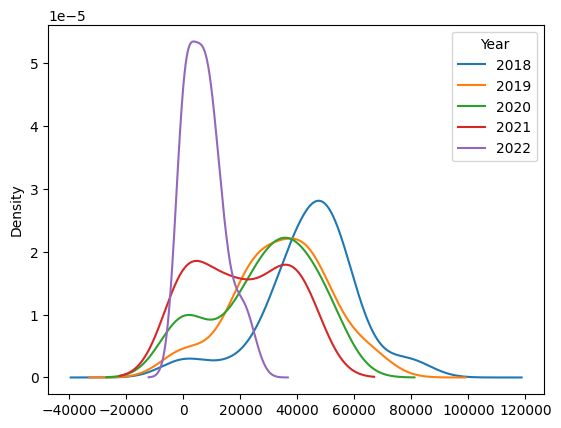

In [135]:
analsis["Miles"].plot(kind='kde')

<Axes: ylabel='Density'>

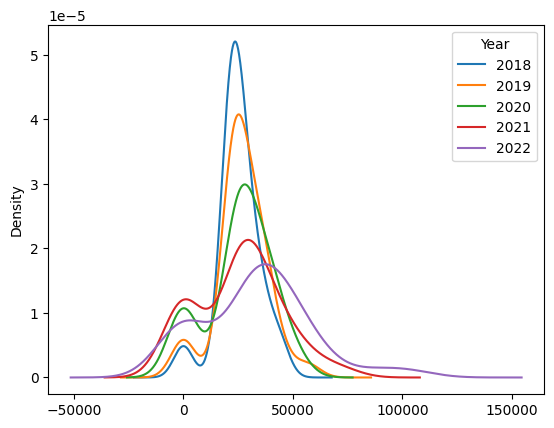

In [136]:
analsis["Price"].plot(kind='kde')